In [50]:
import pandas as pd
import matplotlib.pyplot as plt

### Read data

All queried fire data

In [51]:
fire_data_path = '../data/intermediate/fire_distance_data.csv'
fire_df = pd.read_csv(fire_data_path)
fire_df.head()

,Fire_Year,Fire_Name,GIS_Acres,Fire_Type,Distance
0,1964,COYOTE (4),65338.877636,Wildfire,597.497529
1,1964,C. HANLY (5),55960.694158,Wildfire,584.111579
2,1964,COZY DELL (5),19218.105903,Wildfire,531.527354
3,1964,HAYFORK HWY. #2 (5),18712.494746,Wildfire,574.839178
4,1964,MATTOLE (5),16887.001024,Wildfire,645.542020


Fire data within the 650-mile radius

In [52]:
nearby_fire_path = '../data/intermediate/nearby_fires.csv'
nearby_fire_df = pd.read_csv(nearby_fire_path)
print(f"Total number of fires within 650-mile radius: {len(nearby_fire_df.index)}")
nearby_fire_df.head()

Total number of fires within 650-mile radius: 71982


,Fire_Year,Fire_Name,GIS_Acres,Fire_Type,Distance
0,1964,COYOTE (4),65338.877636,Wildfire,597.497529
1,1964,C. HANLY (5),55960.694158,Wildfire,584.111579
2,1964,COZY DELL (5),19218.105903,Wildfire,531.527354
3,1964,HAYFORK HWY. #2 (5),18712.494746,Wildfire,574.839178
4,1964,MATTOLE (5),16887.001024,Wildfire,645.542020


Annual cumulative smoke data

In [53]:
smoke_data_path = '../data/intermediate/cumulative_smoke.csv'
smoke_df = pd.read_csv(smoke_data_path)
smoke_df.head() 

,year,cumulative_smoke
0,1964,1075.820025
1,1965,710.245794
2,1966,2615.136579
3,1967,1455.560877
4,1968,970.818183


Clean Gas & Particulate Data

In [54]:
gas_data_path = '../data/intermediate/gas_df_filtered.csv'
gas_df = pd.read_csv(gas_data_path)
gas_df.head()

,state_code,county_code,site_number,parameter,date_local,arithmetic_mean,aqi,year
0,49,35,3001,Carbon monoxide,1970-05-13,5.745833,82.0,1970
1,49,35,3001,Carbon monoxide,1970-05-11,7.190000,91.0,1970
2,49,35,3001,Carbon monoxide,1970-05-12,6.245833,86.0,1970
3,49,35,3001,Carbon monoxide,1970-05-14,3.637500,60.0,1970
4,49,35,3001,Carbon monoxide,1970-05-15,6.238889,90.0,1970


In [55]:
part_data_path = '../data/intermediate/part_df_filtered.csv'
part_df = pd.read_csv(part_data_path)
part_df.head()

,state_code,county_code,site_number,parameter,date_local,arithmetic_mean,aqi,year
0,49,35,12,PM10 Total 0-10um STP,1985-10-08,25.0,23.0,1985
1,49,35,12,PM10 Total 0-10um STP,1985-10-10,48.0,44.0,1985
2,49,35,12,PM10 Total 0-10um STP,1985-10-12,19.0,18.0,1985
3,49,35,12,PM10 Total 0-10um STP,1985-10-14,33.0,31.0,1985
4,49,35,12,PM10 Total 0-10um STP,1985-10-18,67.0,57.0,1985


## Visualizations

1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from your assigned city. Your histogram should indicate the distance cut-off for your modeling work as specified in Step 1.

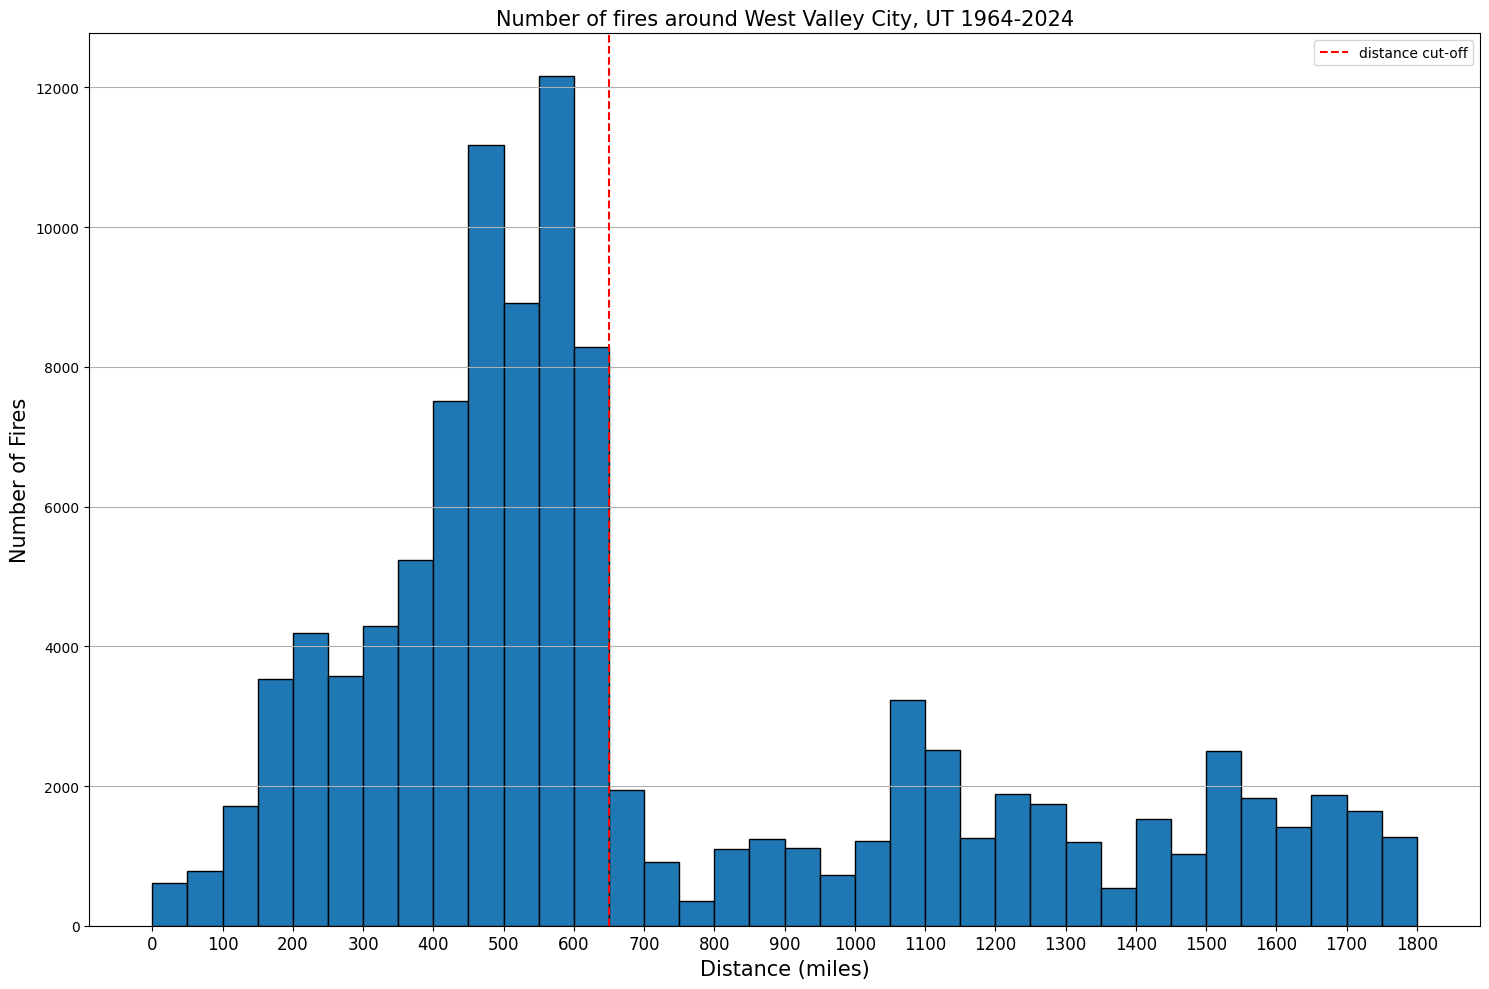

In [60]:
start_year = 1964
end_year = 2024
bin_width = 50
distance_range = 1800

# Fitler data
filtered_fire_df = fire_df[(fire_df['Fire_Year'] >= start_year) & (fire_df['Fire_Year'] <= end_year)]
filtered_fire_df = filtered_fire_df[filtered_fire_df['Distance'] <= distance_range]

_ = plt.figure(figsize=(15, 10))

bins = range(0, distance_range+1, bin_width)
_ = plt.hist(filtered_fire_df['Distance'], bins=bins, edgecolor='black')
_ = plt.title(f'Number of fires around West Valley City, UT {start_year}-{end_year}', fontsize=15)
_ = plt.xlabel('Distance (miles)',fontsize=15)
_ = plt.ylabel('Number of Fires',fontsize=15)
_ = plt.axvline(x=650, color='r', linestyle='--', label='distance cut-off')
_ = plt.legend()
_ = plt.xticks(range(0, distance_range+1, bin_width*2), fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../data/figures/fires_histogram.png')
plt.show()


2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

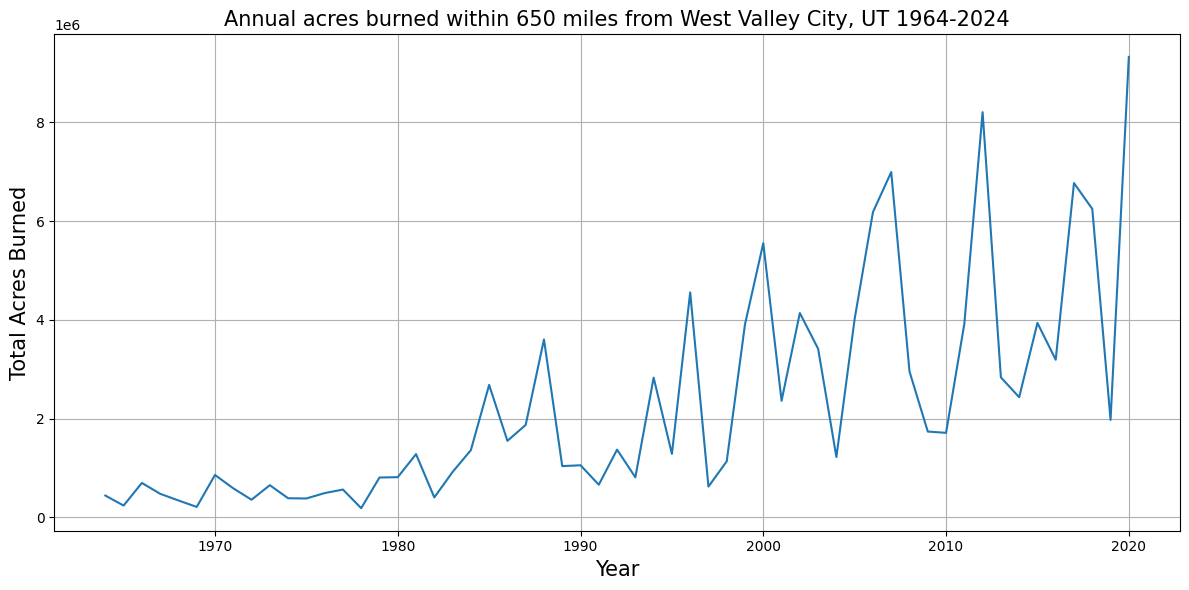

In [57]:
# Filter data
filter_nearby_fire_df = nearby_fire_df[(nearby_fire_df['Fire_Year'] >= start_year) & (nearby_fire_df['Fire_Year'] <= end_year)]
# Get annual acres burned for each year
annual_acres = filter_nearby_fire_df.groupby('Fire_Year')['GIS_Acres'].sum()

plt.figure(figsize=(12, 6))
plt.plot(annual_acres.index, annual_acres.values)
plt.title(f"Annual acres burned within 650 miles from West Valley City, UT {start_year}-{end_year}",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Total Acres Burned",fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('../data/figures/annual_acres_burned.png')
plt.show()

3. Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.

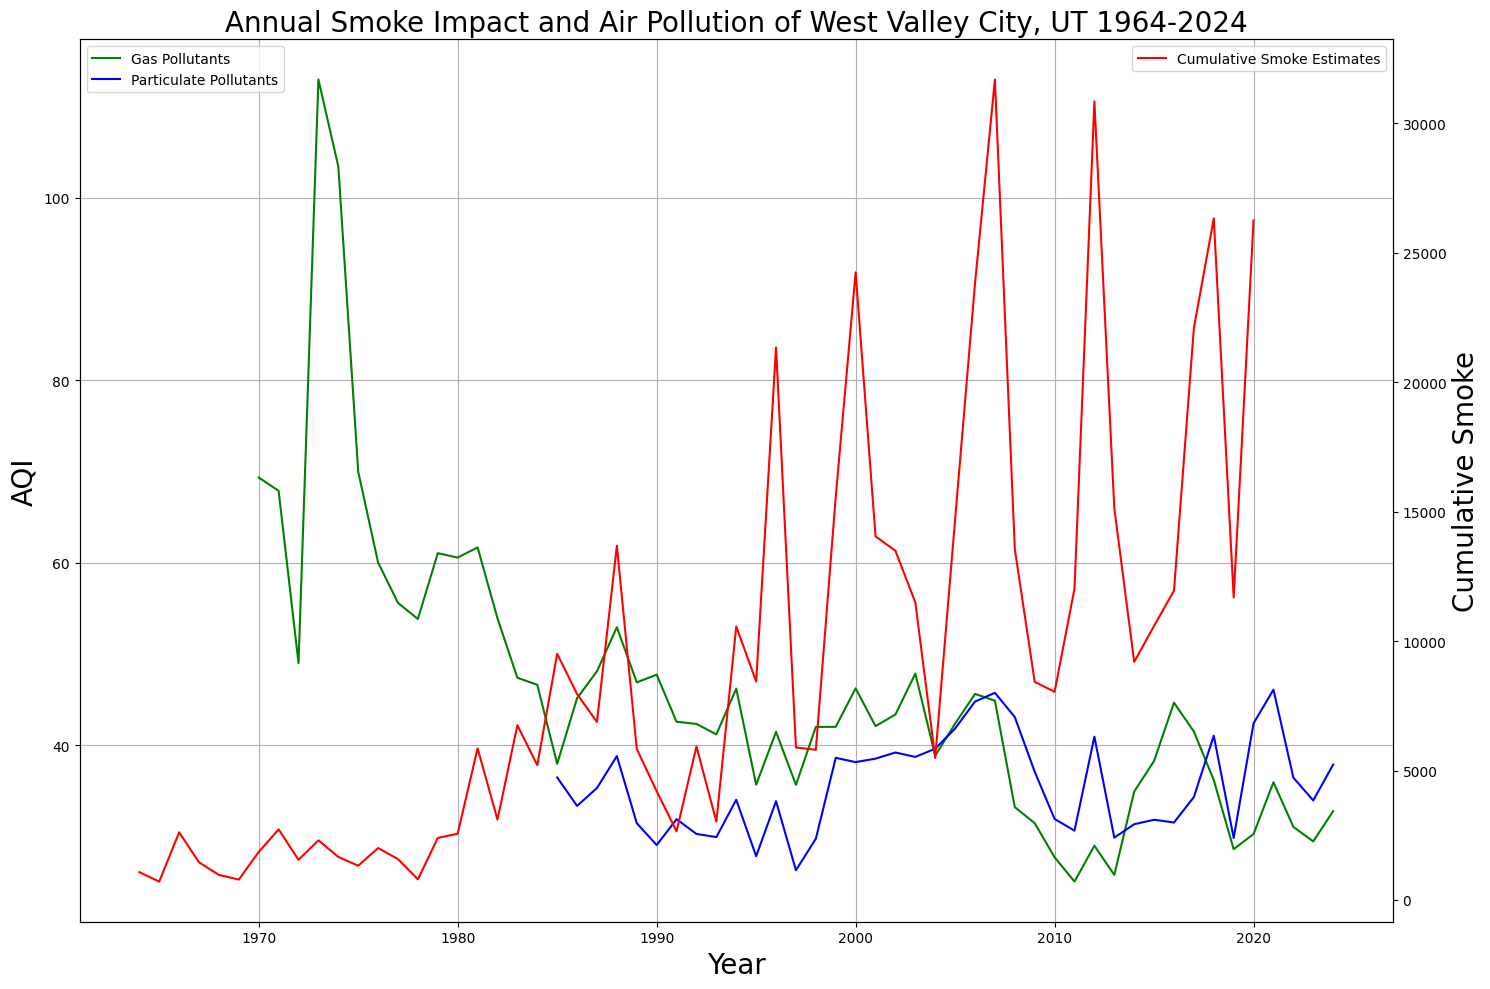

In [61]:
# Group gas data by year and calculate the mean AQI
gas_yearly = gas_df.groupby('year')['aqi'].mean()
part_yearly = part_df.groupby('year')['aqi'].mean()
# Scale the fire year by dividing by 1000
smoke_df['smoke_thousands'] = smoke_df['cumulative_smoke'] / 1000
fig, ax1 = plt.subplots(figsize=(15, 10))

ax2 = ax1.twinx()
ax1.plot(gas_yearly.index, gas_yearly.values, color='g', label="Gas Pollutants")
ax1.plot(part_yearly.index, part_yearly.values, color='b', label="Particulate Pollutants")
ax2.plot(smoke_df['year'], smoke_df['cumulative_smoke'], color='r', label="Cumulative Smoke Estimates")

ax1.set_xlabel("Year", fontsize=20)
ax1.set_ylabel("AQI", fontsize=20)
ax2.set_ylabel("Cumulative Smoke", fontsize=20)

ax1.set_title(f"Annual Smoke Impact and Air Pollution of West Valley City, UT {start_year}-{end_year}", fontsize=20)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)
plt.tight_layout()
plt.savefig('../data/figures/smoke_gas_particulate.png')
plt.show()

Additional graphs for reports   
Compare between annual smoke estimates and annual acres burned

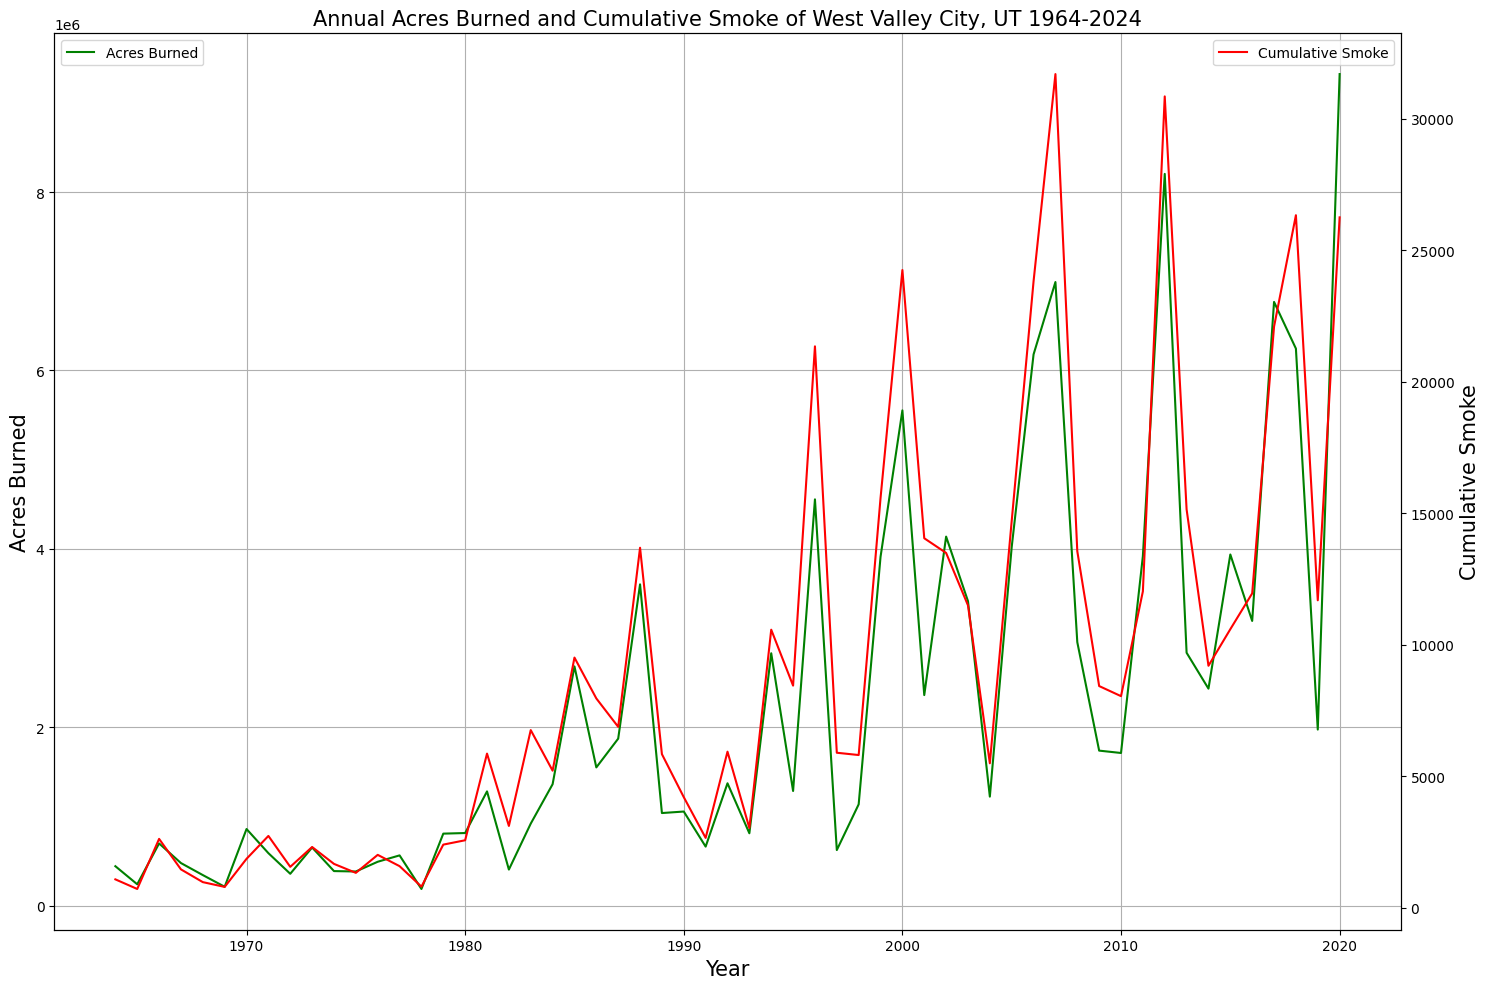

In [58]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax2 = ax1.twinx()
ax1.plot(annual_acres.index, annual_acres.values, color='g', label="Acres Burned")
ax2.plot(smoke_df['year'], smoke_df['cumulative_smoke'], color='r', label="Cumulative Smoke")

ax1.set_xlabel("Year", fontsize=15)
ax1.set_ylabel("Acres Burned", fontsize=15)
ax2.set_ylabel("Cumulative Smoke", fontsize=15)
# ax2.set_yticks(range(0, int(smoke_df['cumulative_smoke'].max())-15000, 5000))
# ax1.set_yticks(range(0, int(annual_acres.values.max()), 10**6))
ax1.set_title(f"Annual Acres Burned and Cumulative Smoke of West Valley City, UT {start_year}-{end_year}", fontsize=15)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)
plt.tight_layout()
plt.savefig('../data/figures/acres_burned_cumulative_smoke.png')
plt.show()